In [1]:
# Keep plots inline in Jupyter Notebook

import numpy as np
%matplotlib inline

In [2]:
# Importing Pandas for data manipulation and analysis
# Loading the Hotel dataset using Pandas

import pandas as pd
hotel_data_set = pd.read_csv('Data_set/Hotel_Booking_Demand.csv')

In [3]:
# Replacing spaces in column names with _

hotel_data_set.columns = [col.replace(" ", "_") for col in hotel_data_set.columns]
hotel_data_set.columns = [col.replace("-", "_") for col in hotel_data_set.columns]

In [4]:
# Printing the first 5 rows of the data set

hotel_data_set.head()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P_C,P_not_C,average_price_,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
# Printing information on the data set

hotel_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P_C                       36285 non-null  int64  
 12  P_not_C                   36285 non-null  int64  
 13  average_price_            36285 non-null  float64
 14  specia

In [6]:
# Droping the Booking_ID column as it is not needed for analysis 

hotel_data_set.drop(columns=['Booking_ID'], inplace=True)

In [7]:
# Function to count the total number of negative values in a specified features

def count_negative_values(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        return (df[column_name] < 0).sum()
    else:
        print(f"Column '{column_name}' is not numeric. Skipping.")
        return None

In [8]:
# Counting the number of negative values in specified features

for column in hotel_data_set.columns:
    print('Number of Negative values in column {} is : {}'.format(column, count_negative_values(hotel_data_set, column)))

Number of Negative values in column number_of_adults is : 0
Number of Negative values in column number_of_children is : 0
Number of Negative values in column number_of_weekend_nights is : 0
Number of Negative values in column number_of_week_nights is : 0
Column 'type_of_meal' is not numeric. Skipping.
Number of Negative values in column type_of_meal is : None
Number of Negative values in column car_parking_space is : 0
Column 'room_type' is not numeric. Skipping.
Number of Negative values in column room_type is : None
Number of Negative values in column lead_time is : 0
Column 'market_segment_type' is not numeric. Skipping.
Number of Negative values in column market_segment_type is : None
Number of Negative values in column repeated is : 0
Number of Negative values in column P_C is : 0
Number of Negative values in column P_not_C is : 0
Number of Negative values in column average_price_ is : 0
Number of Negative values in column special_requests is : 0
Column 'date_of_reservation' is no

In [9]:
# Function to Extract Month from given date

from datetime import datetime

formats = ["%m/%d/%Y", "%Y/%m/%d","%m-%d-%Y", "%Y-%m-%d"]
def extract_month(date_str):
    for fmt in formats:
        try:
            date_object = datetime.strptime(date_str, fmt)
            return date_object.month
        except ValueError:
            pass
    return None  

In [10]:
# Extracting month from column date of reservation

hotel_data_set['month'] = hotel_data_set['date_of_reservation'].apply(extract_month)

In [11]:
# Function to Extract day from given date

def extract_day(date_str):
    for fmt in formats:
        try:
            date_object = datetime.strptime(date_str, fmt)
            return date_object.day
        except ValueError:
            pass
    return None  

In [12]:
# Extracting day from column date of reservation

hotel_data_set['day'] = hotel_data_set['date_of_reservation'].apply(extract_day)

In [13]:
# Function to Extract year from given date

def extract_year(date_str):
    for fmt in formats:
        try:
            date_object = datetime.strptime(date_str, fmt)
            return date_object.year
        except ValueError:
            pass
    return None  

In [14]:
# Extracting year from column date of reservation

hotel_data_set['year'] = hotel_data_set['date_of_reservation'].apply(extract_year)

In [15]:
# Dropping date of reservation column as it is not needed

hotel_data_set.drop(columns = ['date_of_reservation'], axis = 1, inplace = True)

In [16]:
# Checking for missing values

hotel_data_set.isnull().sum()

number_of_adults             0
number_of_children           0
number_of_weekend_nights     0
number_of_week_nights        0
type_of_meal                 0
car_parking_space            0
room_type                    0
lead_time                    0
market_segment_type          0
repeated                     0
P_C                          0
P_not_C                      0
average_price_               0
special_requests             0
booking_status               0
month                       37
day                         37
year                        37
dtype: int64

In [17]:
# Filling missing data set in some features

hotel_data_set['month'] = hotel_data_set['month'].fillna(hotel_data_set['month'].mode()[0])
hotel_data_set['day'] = hotel_data_set['day'].fillna(hotel_data_set['day'].mode()[0])
hotel_data_set['year'] = hotel_data_set['year'].fillna(hotel_data_set['year'].mode()[0])

In [18]:
# Checking for duplicate rows in the dataset

print(sum(hotel_data_set.duplicated()))

10276


In [19]:
# Dropping duplicates

hotel_data_set.drop_duplicates(inplace=True)

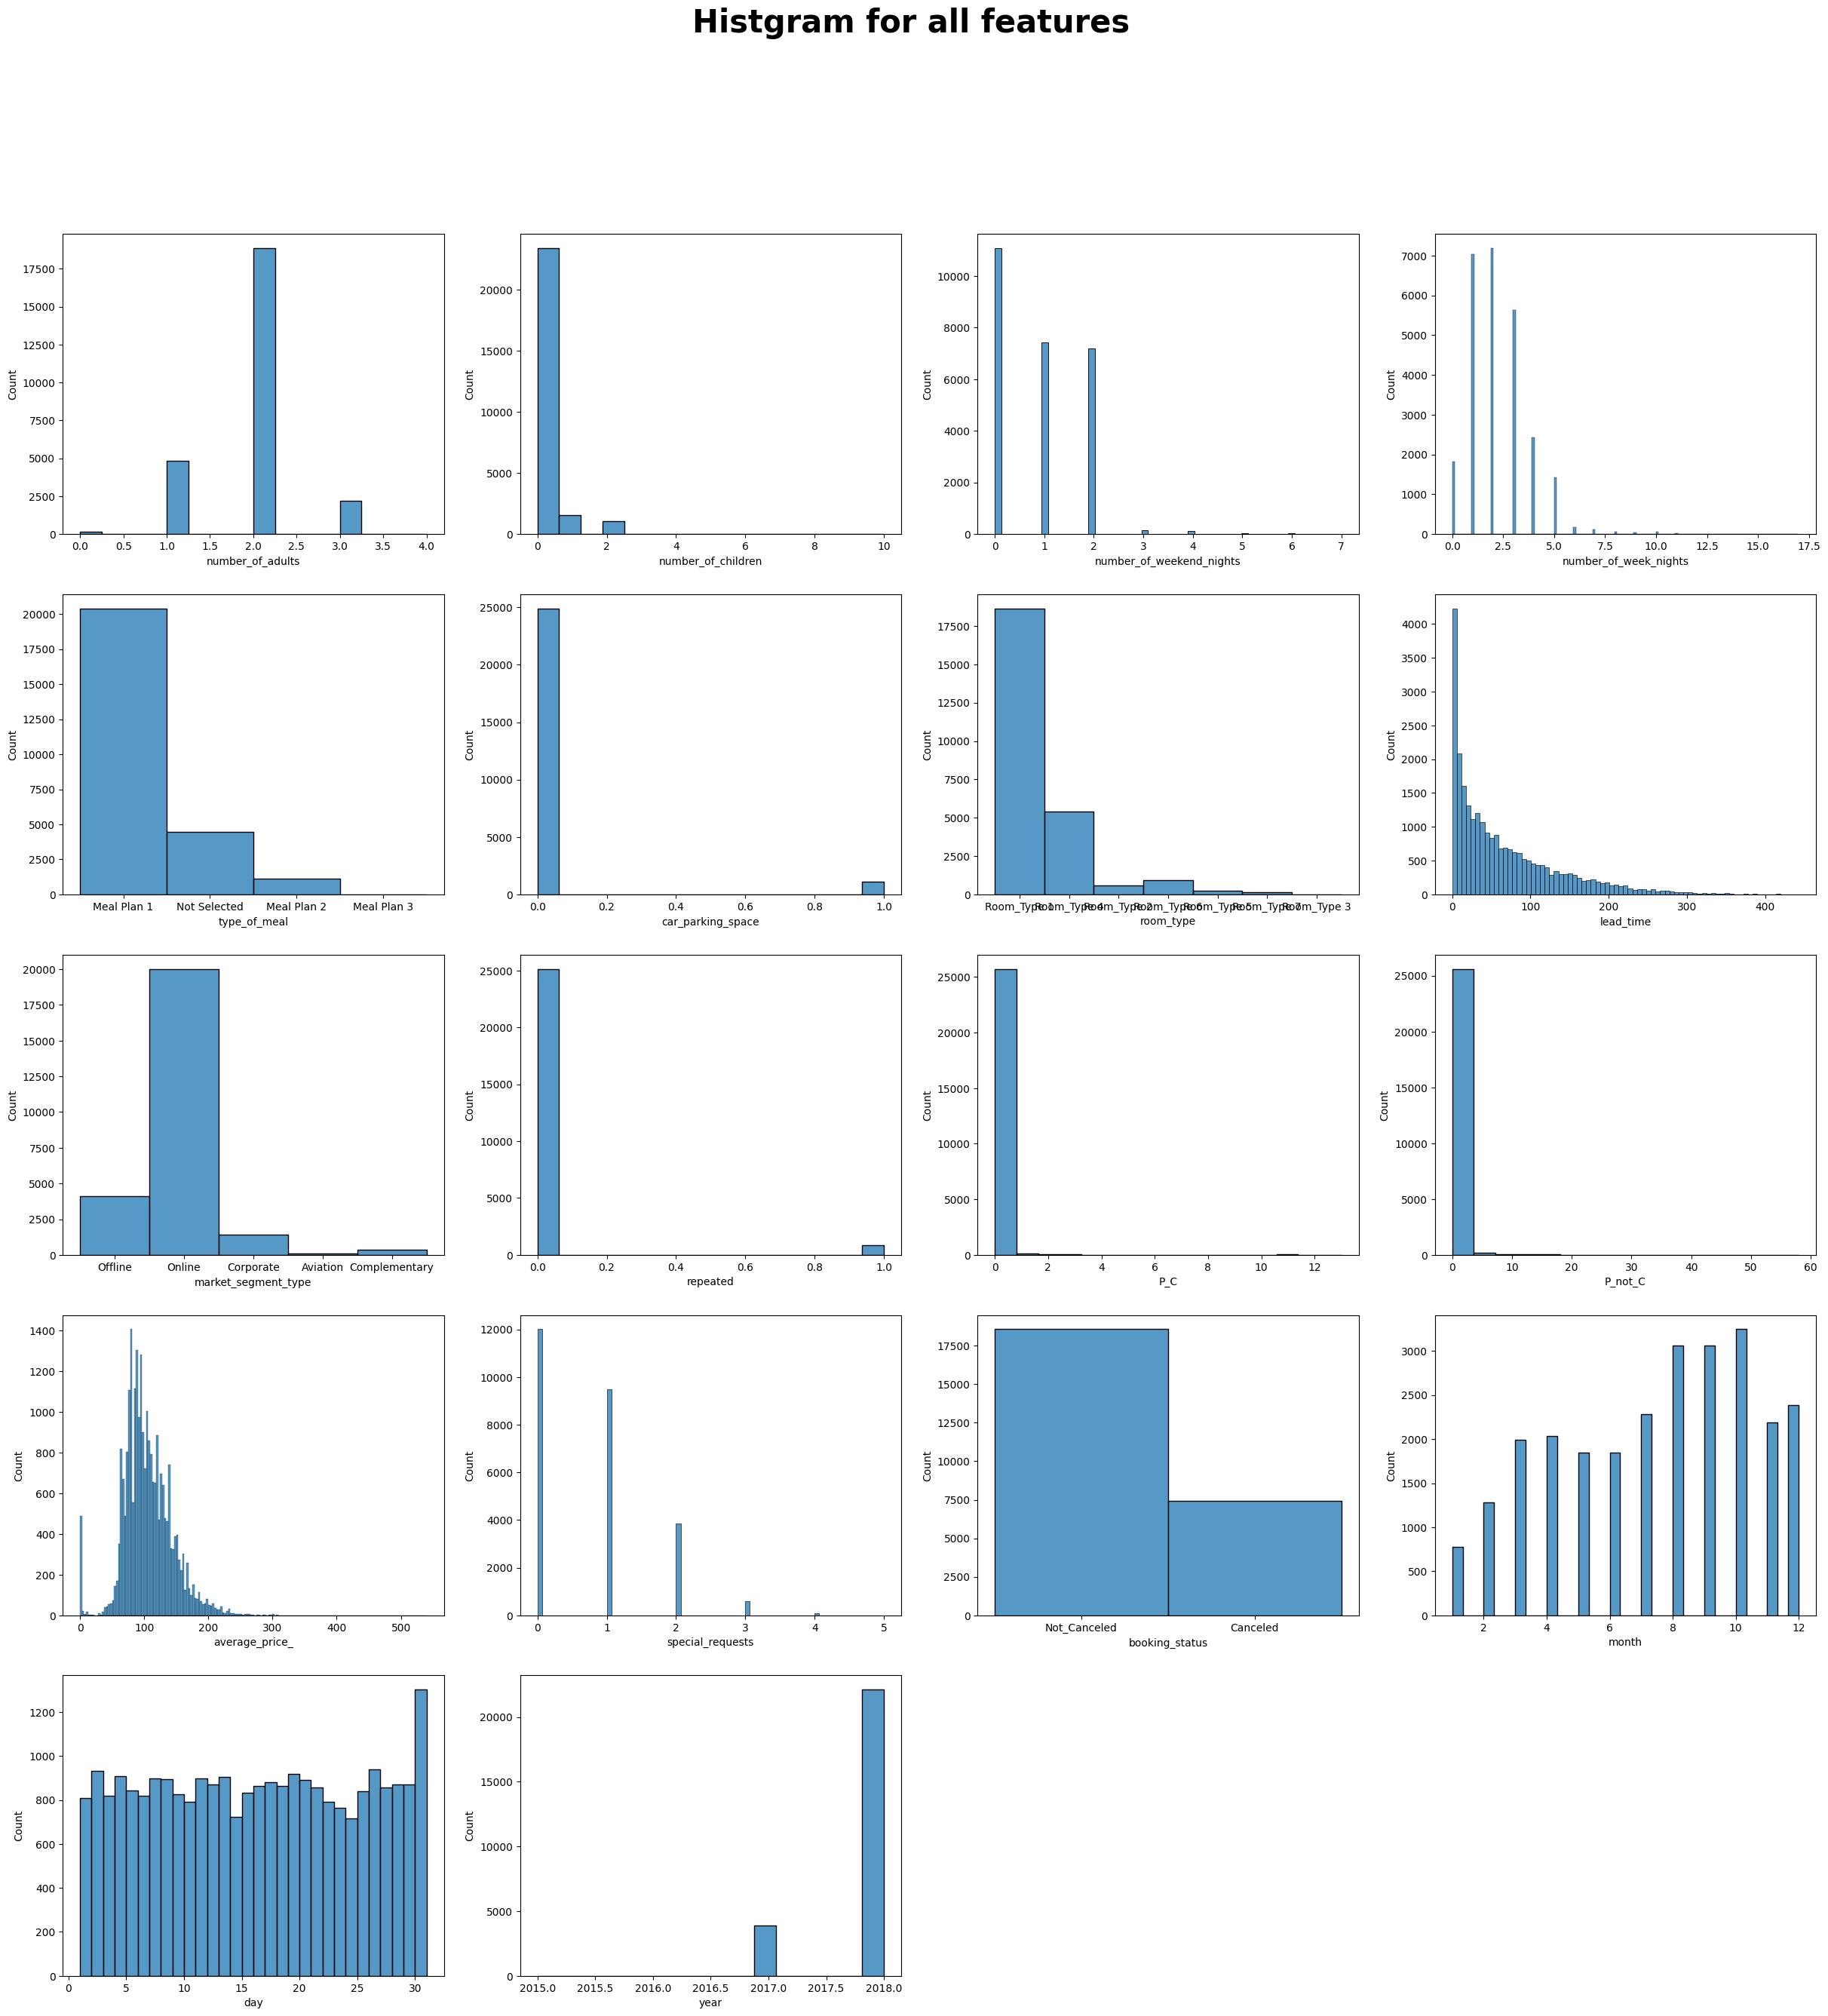

In [20]:
# Importing Matplotlib for plotting graphs
# Importing Seaborn for statistical data visualization
# Plotting histograms for all features in the diabetes dataset

import matplotlib.pyplot as plt
import seaborn as sns

counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for all features",fontweight = "bold", fontsize = 30)
for feature in hotel_data_set.columns:
    counter = counter + 1
    plt.subplot(5,4,counter)
    sns.histplot(hotel_data_set[feature])

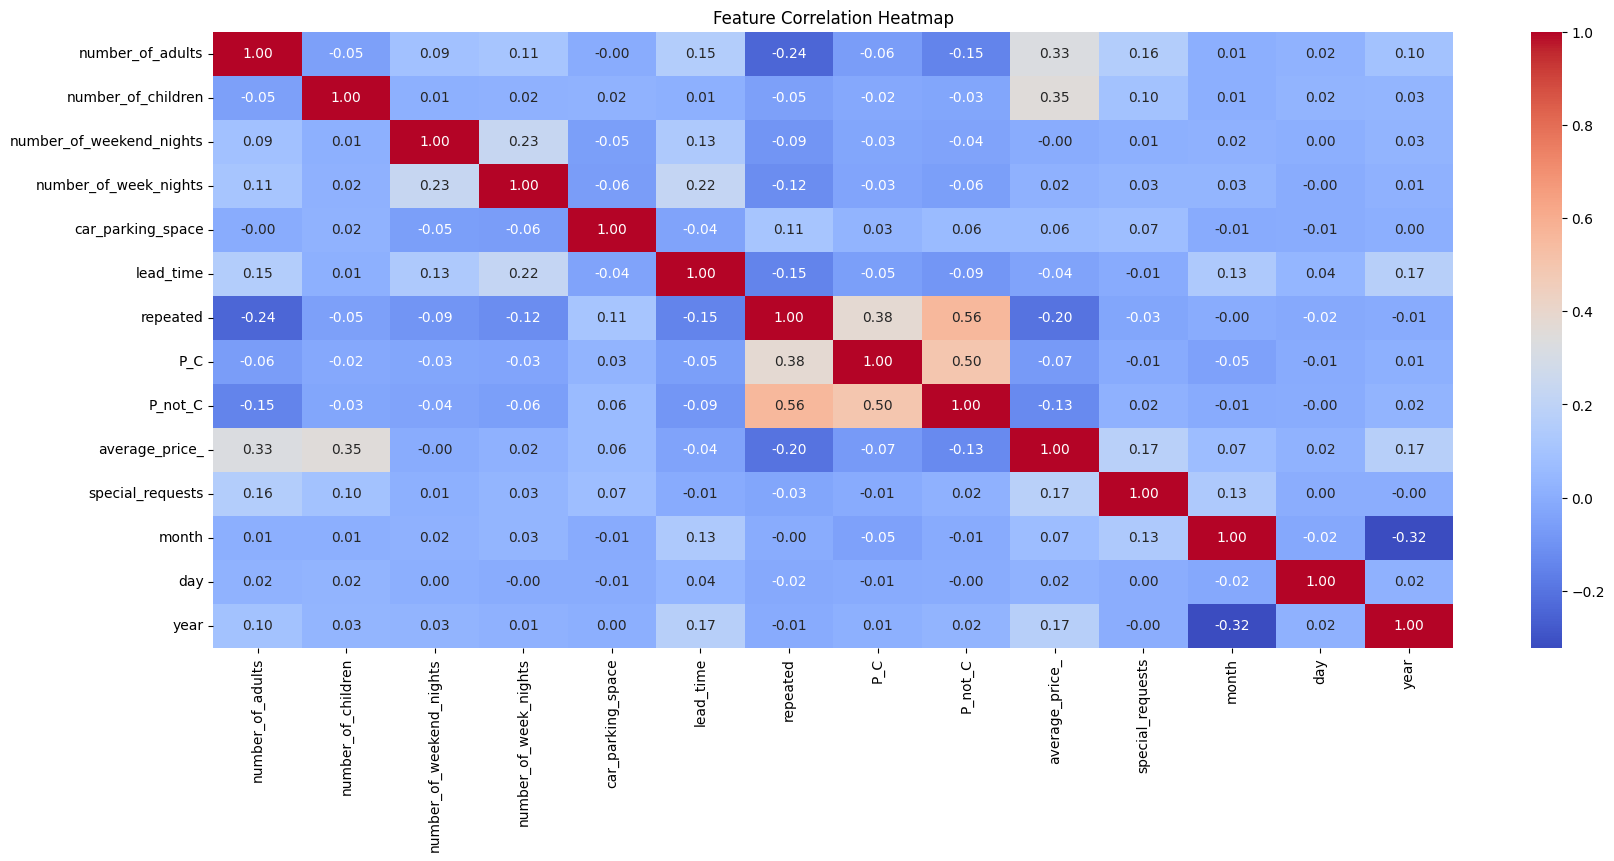

In [21]:
# Plotting the correlation heatmap

correlation_matrix = hotel_data_set.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [22]:
# Label Encodeing target feature

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
hotel_data_set['booking_status']= labelencoder.fit_transform(hotel_data_set['booking_status']) 

In [23]:
# Function to detect outliers

def detect_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for the data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    no_of_outliers = sum((df[column_name] < lower_bound) | (df[column_name] > upper_bound))
    return no_of_outliers

In [24]:
# Function to remove outliers in a specified column

def remove_outliers_rows(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [25]:
# Function to cap outliers in a specified column

def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound,
                               np.where(df[column_name] > upper_bound, upper_bound, df[column_name]))
    return df

In [26]:
# Return the number of outliers

features = ['number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'car_parking_space', 'lead_time',
            'repeated', 'P_C', 'P_not_C', 'average_price_', 'special_requests']
for feature in features:
    print('Number of outliers in column {} is : {}'.format(feature, detect_outliers(hotel_data_set, feature)))

Number of outliers in column number_of_adults is : 7137
Number of outliers in column number_of_children is : 2582
Number of outliers in column number_of_weekend_nights is : 21
Number of outliers in column number_of_week_nights is : 300
Number of outliers in column car_parking_space is : 1095
Number of outliers in column lead_time is : 815
Number of outliers in column repeated is : 852
Number of outliers in column P_C is : 269
Number of outliers in column P_not_C is : 800
Number of outliers in column average_price_ is : 1078
Number of outliers in column special_requests is : 680


In [27]:
# Remove outliers from specified features

remove_outlier_features = ['number_of_weekend_nights']

for feature in remove_outlier_features:
    hotel_data_set = remove_outliers_rows(hotel_data_set, feature)

In [28]:
# Cap outliers in specified features

cap_outlier_features = ['number_of_adults', 'number_of_children', 'number_of_week_nights', 'car_parking_space', 'lead_time',
                         'repeated', 'P_C', 'P_not_C', 'average_price_','special_requests']

for feature in cap_outlier_features:
    hotel_data_set = cap_outliers(hotel_data_set, feature)

In [29]:
# makeing sure that integer columns stay the same

hotel_data_set['number_of_adults'] = hotel_data_set['number_of_adults'].round().astype('int32')
hotel_data_set['number_of_children'] = hotel_data_set['number_of_children'].round().astype('int32')
hotel_data_set['number_of_week_nights'] = hotel_data_set['number_of_week_nights'].round().astype('int32')
hotel_data_set['car_parking_space'] = hotel_data_set['car_parking_space'].round().astype('int32')
hotel_data_set['repeated'] = hotel_data_set['repeated'].round().astype('int32')
hotel_data_set['P_C'] = hotel_data_set['P_C'].round().astype('int32')
hotel_data_set['P_not_C'] = hotel_data_set['P_not_C'].round().astype('int32')
hotel_data_set['special_requests'] = hotel_data_set['special_requests'].round().astype('int32')     

In [30]:
# Preparing the data for modeling

X = hotel_data_set.drop(columns = ['booking_status'], axis = 1)
Y = hotel_data_set['booking_status']

In [31]:
# Importing train_test_split to split the data into training and testing sets
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [32]:
# turnning some features into numerical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X_train[['type_of_meal', 'room_type', 'market_segment_type']])
encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(['type_of_meal', 'room_type', 'market_segment_type']), index=X_train.index)
X_train = pd.concat([X_train.drop(['type_of_meal','room_type','market_segment_type'], axis=1), encoded_data], axis=1)

In [33]:
# Saving the trained OneHotEncoder model to a file
import pickle

pickle.dump(encoder, open('Trained_models/One_Hot_Encoder.pkl', 'wb'))

In [34]:
# Checking for skewness in the dataset

print(X_train.skew())

number_of_adults                      0.000000
number_of_children                    0.000000
number_of_weekend_nights              0.526650
number_of_week_nights                 0.573932
car_parking_space                     0.000000
lead_time                             1.082173
repeated                              0.000000
P_C                                   0.000000
P_not_C                               0.000000
average_price_                        0.320767
special_requests                      0.520060
month                                -0.306578
day                                   0.016260
year                                 -1.964882
type_of_meal_Meal Plan 1             -1.382316
type_of_meal_Meal Plan 2              4.463170
type_of_meal_Meal Plan 3             72.078082
type_of_meal_Not Selected             1.740162
room_type_Room_Type 1                -0.962897
room_type_Room_Type 2                 6.344442
room_type_Room_Type 3                72.078082
room_type_Roo

In [35]:
# Importing PowerTransformer to handle skewness
# Applying Power Transformation to reduce skewness

from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')

X_train[['number_of_weekend_nights', 'number_of_week_nights', 
         'lead_time', 'special_requests']] = pt.fit_transform(X_train[['number_of_weekend_nights', 'number_of_week_nights', 'lead_time', 'special_requests']])

In [36]:
# Checking for skewness in the dataset after Power Transformation

print(X_train.skew())

number_of_adults                      0.000000
number_of_children                    0.000000
number_of_weekend_nights              0.031078
number_of_week_nights                -0.024644
car_parking_space                     0.000000
lead_time                            -0.135665
repeated                              0.000000
P_C                                   0.000000
P_not_C                               0.000000
average_price_                        0.320767
special_requests                      0.087127
month                                -0.306578
day                                   0.016260
year                                 -1.964882
type_of_meal_Meal Plan 1             -1.382316
type_of_meal_Meal Plan 2              4.463170
type_of_meal_Meal Plan 3             72.078082
type_of_meal_Not Selected             1.740162
room_type_Room_Type 1                -0.962897
room_type_Room_Type 2                 6.344442
room_type_Room_Type 3                72.078082
room_type_Roo

In [37]:
# makeing sure that integer columns stay the same

hotel_data_set['number_of_week_nights'] = hotel_data_set['number_of_week_nights'].round().astype('int32')
hotel_data_set['number_of_weekend_nights'] = hotel_data_set['number_of_weekend_nights'].round().astype('int32')
hotel_data_set['special_requests'] = hotel_data_set['special_requests'].round().astype('int32')

In [38]:
# Saving the trained PowerTransformer model to a file

pickle.dump(pt, open('Trained_models/Power_Transformer.pkl', 'wb'))

In [39]:
# Importing StandardScaler to standardize the features
# Data Standrization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [40]:
# Saving the trained StandardScaler model to a file

pickle.dump(scaler, open('Trained_models/Scaler.pkl', 'wb'))

In [41]:
# Importing Variance Inflation Factor to check for multicollinearity
# Function to calculate Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)
    numeric_df = df.select_dtypes(include=[float, int])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

In [42]:
# Calculating VIF for the training data

vif_df = calculate_vif(X_train)
print(vif_df)

/home/ali/Hotel_Booking_Demand/venv_Hotel/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/home/ali/Hotel_Booking_Demand/venv_Hotel/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


    feature       VIF
0         0       NaN
1         1       NaN
2         2  1.048486
3         3  1.131670
4         4       NaN
5         5  1.371685
6         6       NaN
7         7       NaN
8         8       NaN
9         9  2.089588
10       10  1.147034
11       11  1.221857
12       12  1.003796
13       13  1.320188
14       14       inf
15       15       inf
16       16       inf
17       17       inf
18       18       inf
19       19       inf
20       20       inf
21       21       inf
22       22       inf
23       23       inf
24       24       inf
25       25       inf
26       26       inf
27       27       inf
28       28       inf
29       29       inf


In [43]:
# Check for class balance in the target variable

Y_train.value_counts(normalize = True)

booking_status
1    0.714141
0    0.285859
Name: proportion, dtype: float64

In [44]:
# Importing SMOTE for handling class imbalance

import smote_variants as sv

smote = sv.SMOTE(random_state = 42)
X_train, Y_train = smote.sample(X_train, Y_train)

2025-07-21 19:18:51,446:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 42, 'class_name': 'SMOTE'}")
2025-07-21 19:18:51,449:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2025-07-21 19:18:51,450:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2025-07-21 19:18:51,529:INFO:SMOTE: simplex sampling with n_dim 2


In [45]:
np.shape(X_train)

(29694, 30)

In [46]:
# Fitting Testset with trained models 

encoded_X_test = encoder.transform(X_test[['type_of_meal', 'room_type', 'market_segment_type']])
encoded_X_test = pd.DataFrame(encoded_X_test, columns = encoder.get_feature_names_out(['type_of_meal', 'room_type', 'market_segment_type']), index=X_test.index)
X_test = pd.concat([X_test.drop(['type_of_meal','room_type','market_segment_type'], axis=1), encoded_X_test], axis=1)
X_test[['number_of_weekend_nights', 'number_of_week_nights', 'lead_time', 'special_requests']] = pt.transform(X_test[['number_of_weekend_nights', 'number_of_week_nights', 
         'lead_time', 'special_requests']])
X_test = scaler.transform(X_test)

In [47]:
# Importing cudf for GPU acceleration
# Makeing data suitable for GPU 

import cudf

X_train_gpu = cudf.DataFrame(X_train).astype('float32')
Y_train_gpu = cudf.Series(Y_train).astype('float32')
X_test_gpu = cudf.DataFrame(X_test).astype('float32')
Y_test_gpu = cudf.Series(Y_test).astype('float32')

In [48]:
# Importing F1 score for model evaluation
# Importing itertools for generating combinations
# Importing gc for garbage collection

from sklearn.metrics import f1_score
import itertools
import gc

In [49]:
# Importing KNeighborsRegressor from cuML for GPU-accelerated KNN regression
# Initializing the KNN Classifier 

from cuml.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],  
    'metric': ['euclidean', 'manhattan'],     
    'weights': ['uniform'],                   
}

best_score = 0
best_model = None
best_params = None

# Manual grid search
for n_neighbors, weights, metric in itertools.product(
        param_grid['n_neighbors'],
        param_grid['weights'],
        param_grid['metric']):
    
    model = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, metric = metric, algorithm = 'brute')
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {
            'n_neighbors': n_neighbors,
            'weights': weights,
            'metric': metric
        }
    else:
        del model
        gc.collect()
Best_KNN_model = best_model

In [50]:
# Importing accuracy_score roc_auc_score, log_loss for model evaluation

from cuml.metrics import accuracy_score, roc_auc_score

In [51]:
# Making predictions and calculating metrics for the best KNN model

y_preds_KNN = Best_KNN_model.predict(X_test_gpu)
KNN_score = accuracy_score(Y_test_gpu, y_preds_KNN)
KNN_F1 = f1_score(Y_test, y_preds_KNN.to_numpy())
KNN_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_KNN)

In [52]:
# Importing classification_report and confusion_matrix for evaluation

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [53]:
# Printing the classification report for KNN model

CR_KNN = classification_report(Y_test, y_preds_KNN.to_numpy())
print(CR_KNN)

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1486
           1       0.90      0.78      0.84      3712

    accuracy                           0.78      5198
   macro avg       0.74      0.78      0.75      5198
weighted avg       0.81      0.78      0.79      5198



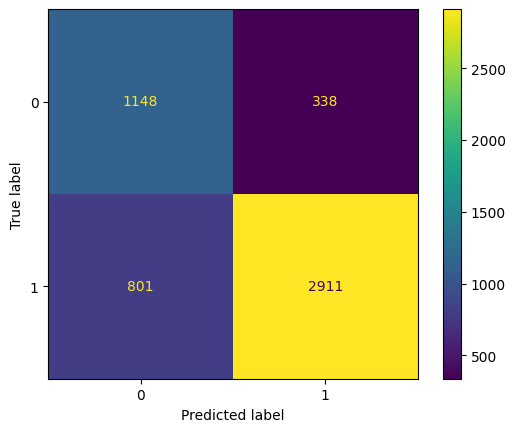

In [54]:
# Confusion matrix for KNN model

CM_KNN = confusion_matrix(Y_test, y_preds_KNN.to_numpy())
CM_KNN = ConfusionMatrixDisplay(CM_KNN)
CM_KNN.plot()
plt.show()

In [ ]:
# Importing LogisticRegression from cuML for GPU-accelerated logistic regression
# Initializing the Logistic Regression model with hyperparameters

from cuml.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],                   
    'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10], 
    'max_iter': [1000, 2000],  
    'tol': [1e-5, 1e-4, 1e-3, 1e-2],
    'fit_intercept': [True, False],         
    'solver': ['qn']                         
}

best_score = 0
best_model = None
best_params = None

# Manual grid search
for penalty, C, fit_intercept, max_iter, tol, solver in itertools.product(
        param_grid['penalty'],
        param_grid['C'],
        param_grid['fit_intercept'],
        param_grid['max_iter'],
        param_grid['tol'],
        param_grid['solver']):
    # Handle l1_ratio only when penalty == 'elasticnet'
    if penalty == 'elasticnet':
        for l1_ratio in param_grid['l1_ratio']:
            model = LogisticRegression(
                penalty=penalty,
                C=C,
                fit_intercept=fit_intercept,
                max_iter=max_iter,
                tol=tol,
                solver=solver,
                l1_ratio=l1_ratio
            )
            model.fit(X_train_gpu, Y_train_gpu)

            preds = model.predict(X_test_gpu).to_numpy()
            score = f1_score(Y_test, preds, average='weighted')

            if score > best_score:
                best_score = score
                best_model = model
                best_params = {
                    'penalty': penalty,
                    'C': C,
                    'fit_intercept': fit_intercept,
                    'max_iter': max_iter,
                    'tol': tol,
                    'solver': solver,
                    'l1_ratio': l1_ratio
                }
            else:
                del model
                gc.collect()
    else:
        model = LogisticRegression(
            penalty=penalty,
            C=C,
            fit_intercept=fit_intercept,
            max_iter=max_iter,
            tol=tol,
            solver=solver
            # No l1_ratio here
        )
        model.fit(X_train_gpu, Y_train_gpu)

        preds = model.predict(X_test_gpu).to_numpy()
        score = f1_score(Y_test, preds, average='weighted')

        if score > best_score:
            best_score = score
            best_model = model
            best_params = {
                'penalty': penalty,
                'C': C,
                'fit_intercept': fit_intercept,
                'max_iter': max_iter,
                'tol': tol,
                'solver': solver
            }
        else:
           del model
           gc.collect()
Best_Logistic_model = best_model

[2025-07-21 19:18:59.113] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:18:59.461] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:19:01.157] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:19:01.879] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:19:02.716] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:19:04.138] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:19:04.367] [CUML] [warning] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[2025-07-21 19:19:04.949] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
[2025-07-21 19:19:06.211] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the las

In [56]:
# Print Feature Importances for the Logistic Regreesion model

importances = pd.Series(Best_Logistic_model.coef_.to_pandas().values.ravel(), index = X_train_gpu.columns).sort_values(ascending = False)
print("Top 5 Important Features:")
print(importances.head(5))

Top 5 Important Features:
10    1.148609
28    0.492251
26    0.155993
23    0.056969
14    0.047203
dtype: float32


In [57]:
# Making predictions and calculating metrics for the best Logistic Regression model

y_preds_Logistic = Best_Logistic_model.predict(X_test_gpu)
Logistic_score = accuracy_score(Y_test_gpu, y_preds_Logistic)
Logistic_F1 = f1_score(Y_test, y_preds_Logistic.to_numpy())
Logistic_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_Logistic)

In [58]:
# Printing the classification report for Logistic Regression model

CR_logistic = classification_report(Y_test, y_preds_Logistic.to_numpy())
print(CR_logistic)

              precision    recall  f1-score   support

           0       0.59      0.76      0.66      1486
           1       0.89      0.79      0.84      3712

    accuracy                           0.78      5198
   macro avg       0.74      0.77      0.75      5198
weighted avg       0.81      0.78      0.79      5198



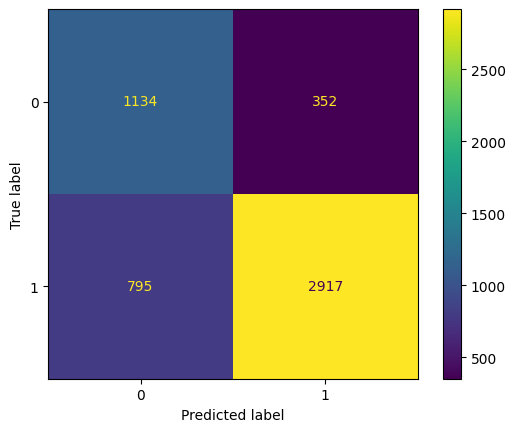

In [59]:
# Confusion matrix for Logistic model

CM_logistic = confusion_matrix(Y_test, y_preds_Logistic.to_numpy())
CM_logistic = ConfusionMatrixDisplay(CM_logistic)
CM_logistic.plot()
plt.show()

In [ ]:
# Importing RandomForestClassifier from cuML for GPU-accelerated random forest classification
# Initializing the Random Forest Classifier with hyperparameters

from cuml.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200, 250],   
    'max_depth': [6, 8, 10, 12],            
    'max_features': [0.6, 0.8, 1.0],        
    'bootstrap': [True],                    
    'split_criterion': ['gini'],    
    'max_leaves': [64, 128, 256],           
    'max_samples': [0.7, 0.8, 0.9, 1.0]     
}

best_score = 0
best_model = None
best_params = None

# Manual grid searchS
for n_estimators, max_depth, max_features, bootstrap, split_criterion, max_leaves, max_samples in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['max_features'],
        param_grid['bootstrap'],
        param_grid['split_criterion'],
        param_grid['max_leaves'],
        param_grid['max_samples']):
    
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, bootstrap = bootstrap, 
                                   split_criterion = split_criterion, max_leaves = max_leaves, max_samples = max_samples, random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'bootstrap': bootstrap,
            'split_criterion': split_criterion,
            'max_leaves': max_leaves,
            'max_samples': max_samples
        }
    else:
        del model
        gc.collect()
        
Best_RandomForest_model = best_model

In [60]:
# Saving the best models to files

pickle.dump(Best_RandomForest_model, open('Trained_models/RandomForest_model.pkl', 'wb'))

In [60]:
# Loading the best Random Forest model from file

Best_RandomForest_model = pickle.load(open('Trained_models/RandomForest_model.pkl', 'rb'))

In [61]:
# Making predictions and calculating metrics for the best RandomForest model

y_preds_RandomForest = Best_RandomForest_model.predict(X_test_gpu)
RandomForest_score = accuracy_score(Y_test_gpu, y_preds_RandomForest)
RandomForest_F1 = f1_score(Y_test, y_preds_RandomForest.to_numpy())
RandomForest_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_RandomForest)

In [62]:
# Printing the classification report for Random Forest model

CR_RandomForest = classification_report(Y_test, y_preds_RandomForest.to_numpy())
print(CR_RandomForest)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1486
           1       0.89      0.88      0.89      3712

    accuracy                           0.84      5198
   macro avg       0.81      0.81      0.81      5198
weighted avg       0.84      0.84      0.84      5198



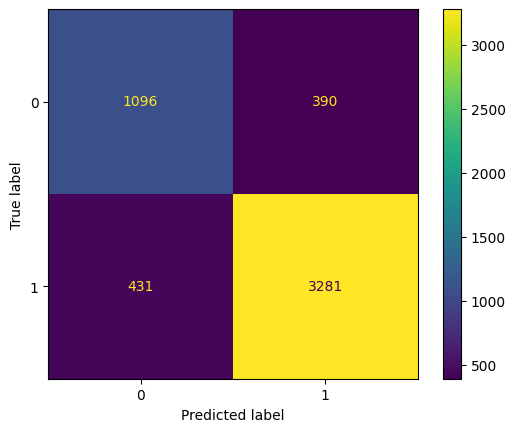

In [63]:
# Confusion matrix for RandomForest model

CM_RandomForest = confusion_matrix(Y_test, y_preds_RandomForest.to_numpy())
CM_RandomForest = ConfusionMatrixDisplay(CM_RandomForest)
CM_RandomForest.plot()
plt.show()

In [ ]:
# Importing SVC from cuML for GPU-accelerated support vector classification
# Initializing the SVC model with hyperparameters
from cuml.svm import SVC

param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0],                
    'kernel': ['rbf', 'linear'],          
    'gamma': ['scale', 0.01, 0.1],                 
    'tol': [1e-3, 1e-2],                        
    'max_iter': [1000]                    
}

best_score = 0
best_model = None
best_params = None

for C, kernel, gamma, tol, max_iter, in itertools.product(
        param_grid['C'],
        param_grid['kernel'],
        param_grid['gamma'],
        param_grid['tol'],
        param_grid['max_iter']):

    svc_params = {
        'C': C,
        'kernel': kernel,
        'gamma': gamma,
        'tol': tol,
        'max_iter': max_iter
    }

    model = SVC(**svc_params)
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average='weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_params = svc_params
        best_model = model
    else:
        del model
        gc.collect()
Best_SVM_model = best_model

[2025-07-21 19:19:19.452] [CUML] [warning] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


In [65]:
# Making predictions and calculating metrics for the best SVM model

y_preds_SVM = Best_SVM_model.predict(X_test_gpu)
SVM_score = accuracy_score(Y_test_gpu, y_preds_SVM)
SVM_F1 = f1_score(Y_test, y_preds_SVM.to_numpy())
SVM_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_SVM)

In [66]:
# Printing the classification report for SVM model

CR_SVM = classification_report(Y_test, y_preds_SVM.to_numpy())
print(CR_SVM)

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1486
           1       0.90      0.82      0.86      3712

    accuracy                           0.81      5198
   macro avg       0.77      0.79      0.78      5198
weighted avg       0.82      0.81      0.81      5198



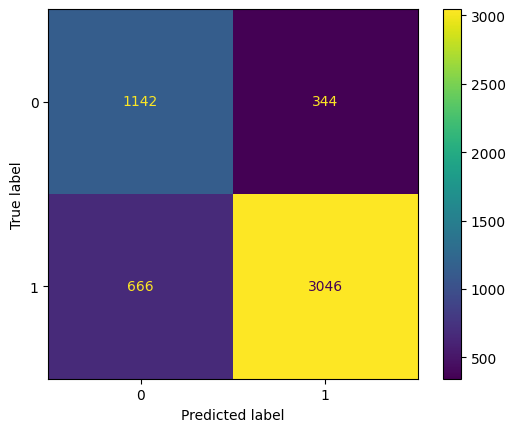

In [67]:
# Confusion matrix for SVM model

CM_SVM = confusion_matrix(Y_test, y_preds_SVM.to_numpy())
CM_SVM = ConfusionMatrixDisplay(CM_SVM)
CM_SVM.plot()
plt.show()

In [68]:
# Importing XGBClassifier from XGBoost for GPU-accelerated gradient boosting classification
# Initializing the XGBClassifier with GPU support and hyperparameters

from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 150, 200],       
    'max_depth': [4, 6, 8],                
    'learning_rate': [0.05, 0.1, 0.2],       
    'subsample': [0.7, 0.8, 1.0],          
    'colsample_bytree': [0.6, 0.8],        
    'gamma': [0, 0.1],                     
    'reg_alpha': [0, 0.1],                 
    'reg_lambda': [0.5, 1.0, 5],                   
    'min_child_weight': [1, 3]             
}

best_score = 0
best_model = None
best_params = None

for n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda, min_child_weight in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['learning_rate'],
        param_grid['subsample'],
        param_grid['colsample_bytree'],
        param_grid['gamma'],
        param_grid['reg_alpha'],
        param_grid['reg_lambda'],
        param_grid['min_child_weight']):
    
    model = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree,
        gamma = gamma, reg_alpha = reg_alpha, reg_lambda = reg_lambda, min_child_weight = min_child_weight,tree_method = 'hist', device = 'cuda', eval_metric = 'logloss', 
        random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'gamma': gamma,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda,
            'min_child_weight': min_child_weight
        }
    else:
        del model
        gc.collect()

Best_XGB_model = best_model

In [69]:
# Print Feature Importances for the XGB model

importances = pd.Series(Best_XGB_model.feature_importances_, index = X_train_gpu.columns).sort_values(ascending = False)
print("Top 5 Important Features:")
print(importances.head(5))

Top 5 Important Features:
29    0.252239
10    0.184134
28    0.153248
5     0.073202
27    0.042534
dtype: float32


In [70]:
# Saving the best models to files

pickle.dump(Best_XGB_model, open('Trained_models/XGB_model.pkl', 'wb'))

In [ ]:
# Loading the best XGB model from file

Best_XGB_model = pickle.load(open('Trained_models/XGB_model.pkl', 'rb'))

In [71]:
# Making predictions and calculating metrics for the best XGB model

y_preds_XGB = Best_XGB_model.predict(X_test_gpu)
XGB_score = accuracy_score(Y_test_gpu, y_preds_XGB)
XGB_F1 = f1_score(Y_test, y_preds_XGB)
XGB_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_XGB)

In [72]:
# Printing the classification report for XGB model

CR_XGB = classification_report(Y_test, y_preds_XGB)
print(CR_XGB)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1486
           1       0.89      0.90      0.90      3712

    accuracy                           0.85      5198
   macro avg       0.82      0.82      0.82      5198
weighted avg       0.85      0.85      0.85      5198



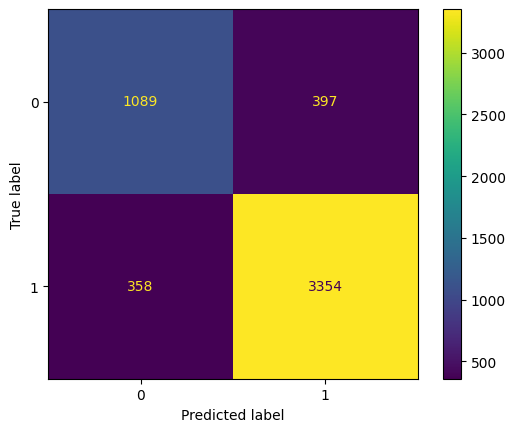

In [73]:
# Confusion matrix for XGB model

CM_XGB = confusion_matrix(Y_test, y_preds_XGB)
CM_XGB = ConfusionMatrixDisplay(CM_XGB)
CM_XGB.plot()
plt.show()

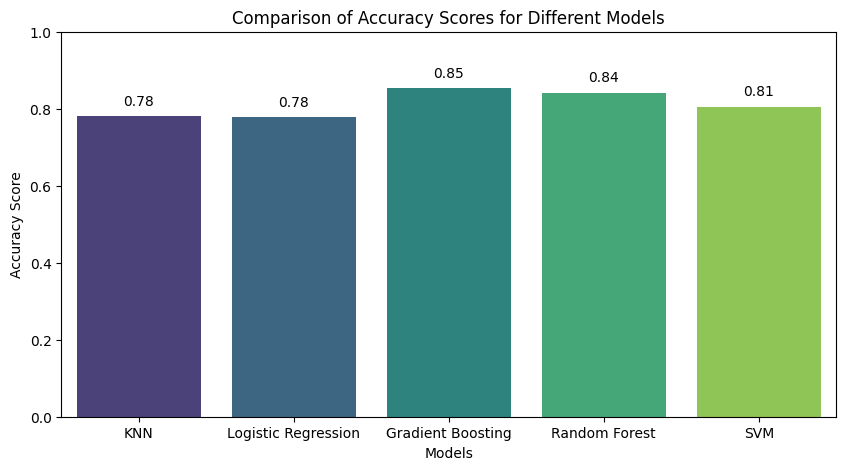

In [77]:
# Comparison of Accuracy Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
scores = [KNN_score, Logistic_score, XGB_score, RandomForest_score, SVM_score]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

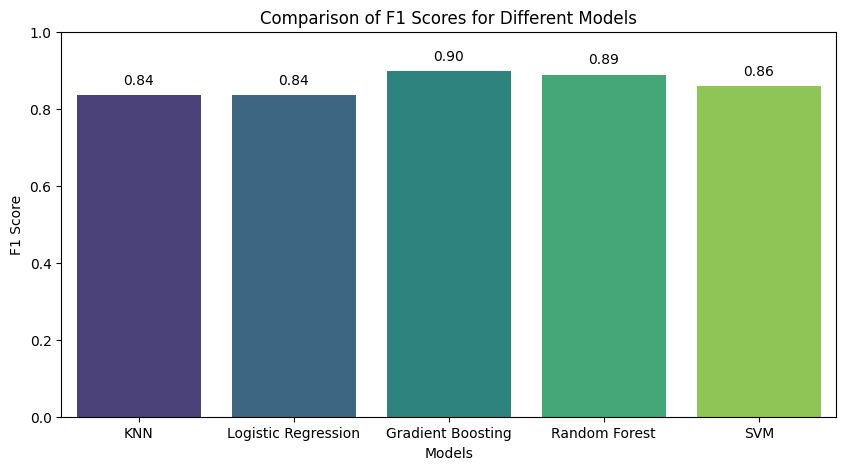

In [78]:
# Comparison of F1 Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
F1_scores = [KNN_F1, Logistic_F1, XGB_F1, RandomForest_F1, SVM_F1]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = F1_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(F1_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

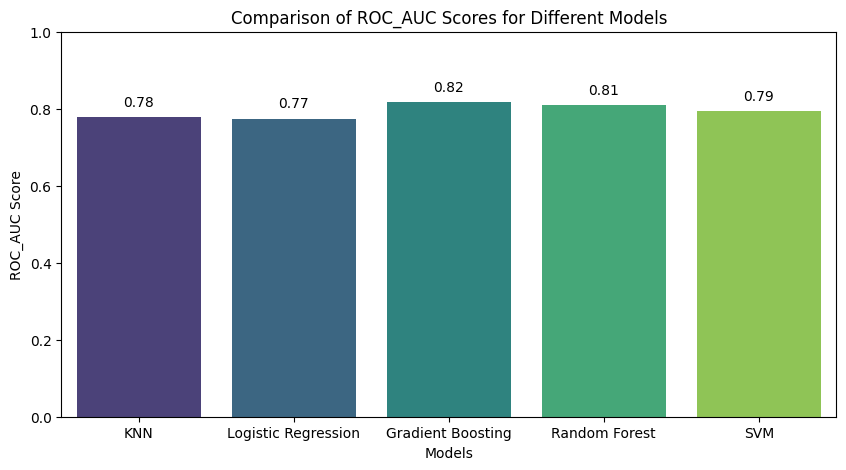

In [79]:
# Comparison of ROC_AUC Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
ROUC_AUC_scores = [KNN_ROC_AUC, Logistic_ROC_AUC, XGB_ROC_AUC, RandomForest_ROC_AUC, SVM_ROC_AUC]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = ROUC_AUC_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('ROC_AUC Score')
plt.title('Comparison of ROC_AUC Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(ROUC_AUC_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')

plt.show()

In [80]:
# Saving the best models to files based on results

pickle.dump(Best_XGB_model, open('Trained_models/Hotel.pkl', 'wb'))